In [6]:

# 1. From Canvas download wiki_labeled.zip (MD5sum: 8af376e8a0f9898d8d3dd5653351070e) , and extract the contents. 
#The wiki_labeled/ directory will contains 60327 facial images kept in 100 folders, naming 00-99. Dimension of each 
#image is 100 pixels by 100 pixels. Also, download the wiki_labeled.mat (md5sum: d5b65bb4c4d414a230b60b8025ece276) file,
#containing meta information of each of the 60327 images: • ID: identification number of the subject (starting from 2002)
#• dob: the date of birth of the subject. (It is Matlab’s datenum value calculated based on total number of days since 
#January 0, 0000.) • dob_str: the DD-MMM-YYYY format dob value. • photo_taken: when the photo was taken (only the year  
#value) • full_path: directory path, including filename of the image • gender: Gender of the subject (0: female, 1: male, 
#NaN if unknown) • name: name of the subject • face_location: location of the face. • face_score: detector score (the
#higher the better). Inf implies that no face was found in the image, and the face_location then just returns the entire 
#image. • second_face_score: detector score of the face with the second highest score. This is useful to ignore images 
#with more than one face. second_face_score is NaN (not a number) if no second face was detected. • age: age of the person 
#(in years), and was calculated based on the “dob” value and the “photo_taken” values.
#Hint: To read/extract information from the mat file above, please use the loadmat library from scipy.io in python . 
#[  from scipy.io import loadmat ]
    
    

In [1]:

import pandas as pd
import numpy as np 
import scipy as stats
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from scipy.io import loadmat
import glob 
from PIL import Image 


In [2]:
metaData =loadmat("wiki_labeled.mat",squeeze_me=True, struct_as_record=True)

ID = metaData['wiki_labeled']['ID'].item(0)
dob = metaData['wiki_labeled']['dob'].item(0)
dob_str = metaData['wiki_labeled']['dob_str'].item(0)
photo_taken = metaData['wiki_labeled']['photo_taken'].item(0)
full_path = metaData['wiki_labeled']['full_path'].item(0)
gender = metaData['wiki_labeled']['gender'].item(0)
name = metaData['wiki_labeled']['name'].item(0)
face_location = metaData['wiki_labeled']['face_location'].item(0)
face_score = metaData['wiki_labeled']['face_score'].item(0)
second_face_score = metaData['wiki_labeled']['second_face_score'].item(0)
age = metaData['wiki_labeled']['age'].item(0)


dat =[ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age]

dat1 = pd.DataFrame(dat)
#print(dat1)
dat2 = dat1.T
print(len(dat2))

60327


In [3]:
dat2.columns=['ID','dob','dob_str','photo_taken','full_path','gender','name','face_location','face_score','second_face_score','age']
#dat2.isnull()

In [4]:
print(face_score[i-1])

NameError: name 'i' is not defined

In [5]:
#images =np.array([60327,10000])
images =[]
print(type(images))
for i in np.nditer(full_path.size):
    images= full_path
#print(images) 
#images.size
type(images)
#images.shape
#images.index('670663_2015-02-16UTC08:04_1941.png')
np.where(images == '63/670663_2015-02-16UTC08:04_1941.png')
print(images[4974])
images[4974] = '63/670663_2015-02-16UTC08_04_1941.png'
print(images[4974])

<class 'list'>
63/670663_2015-02-16UTC08:04_1941.png
63/670663_2015-02-16UTC08_04_1941.png


In [12]:
# print(images.size)
# print(images.shape)

In [ ]:
cv2.imread('C:\\Users\\kusha\\Desktop\\sem2\\ML\\PA2\\wiki_labeled\\11\\77911_1963-07-22_2015.png')


In [7]:
import glob
import cv2
from scipy.misc import imread
import os 
imag = images.tolist()
image1 = []
#print(type(imag))
#print(os.getcwd()+"\\wiki_labeled")
im = os.getcwd()+"\\wiki_labeled"
#print(os.path.join(os.getcwd(),imag))
for i in imag:
    image1.append(os.path.join(im,i).replace("/","\\"))

images2 =[stats.misc.imread(file) for file in (image1)]

images2


C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


OSError: [Errno 22] Invalid argument

In [6]:
#type(images)
#images[1].shape

a=np.array(images2)
print(type(a))
#print(a.size)
#print(len(a))
print(a[1].shape)
print(a.shape)


c=np.empty([60327,10000])
#print(c.shape)
for i in np.nditer(a.size):
    c=np.reshape(a,(60327,10000))
     
print(c.shape)


<class 'numpy.ndarray'>
(100, 100)
(60327, 100, 100)
(60327, 10000)


In [16]:
#2.Randomly split the dataset into 80% training and 20% test sets.

In [37]:

from sklearn.model_selection import train_test_split
#train_test_split will randomly split the data 

test,train , testy, trainy  =train_test_split(c,age,test_size=0.8) 

print(len(train))
#print(len(test))
print(train.size)
print(train.shape)
#train

48262
482620000
(48262, 10000)


In [19]:
#3. Compute the principal components (i.e., eigenfaces) from the training dataset by following the steps to compute
#principal components described in the “Backgrounds” section. Please note that: you can not call a library function to 
#directly compute the principal components. For example: the PCA library in sklearn. However, you can use library 
    #functions to calculate the eigenvalues and eigenvectors of a square matrix.

In [38]:
# import sys
# clear = lambda: os.system('cls')
# clear()
import gc
gc.collect()
tr=train
#tr = train.astype(np.float32)/255

#mean = np.mean(tr)
# print ("Mean=" , mean)

#tr1 =tr - mean


#for i in np.nditer(len(tr)):
#    tr =tr -np.mean(tr)
#    print(tr)
#gc.collect()


In [39]:
tr

array([[  0,   0,   0, ...,   0,   0,   0],
       [ 63,  61,  33, ..., 102,  99, 100],
       [179, 179, 180, ...,  76,  74,  74],
       ...,
       [  1,   3,   2, ...,  20,  14,   6],
       [ 62,  80,  37, ...,  17,  17,  19],
       [169, 169, 238, ...,  58,  58,  58]])

In [40]:
#tr -= np.mean(tr,axis=0).reshape(1,-1)
gc.collect()
cen = tr - np.mean(tr,axis=0).reshape(1,-1)
cen

array([[-97.48493639, -97.26983963, -97.08843396, ..., -92.54112967,
        -92.66810327, -93.04626829],
       [-34.48493639, -36.26983963, -64.08843396, ...,   9.45887033,
          6.33189673,   6.95373171],
       [ 81.51506361,  81.73016037,  82.91156604, ..., -16.54112967,
        -18.66810327, -19.04626829],
       ...,
       [-96.48493639, -94.26983963, -95.08843396, ..., -72.54112967,
        -78.66810327, -87.04626829],
       [-35.48493639, -17.26983963, -60.08843396, ..., -75.54112967,
        -75.66810327, -74.04626829],
       [ 71.51506361,  71.73016037, 140.91156604, ..., -34.54112967,
        -34.66810327, -35.04626829]])

In [13]:
#import matplotlib.pyplot as plt

In [24]:
#plt.imshow(cen[0].reshape(100,100))

In [41]:
import gc
gc.collect()
#d = np.array([60327,10000])
e=cen.T
e.shape

(10000, 48262)

In [42]:
#d = e.dot(tr)
d = e.dot(cen)

In [43]:
cen.shape

(48262, 10000)

In [45]:
print(d)
print(d.shape)

scaled = d/(cen.shape[0]-1)

[[3.30356587e+08 3.26583397e+08 3.21690864e+08 ... 1.27549045e+08
  1.35305800e+08 1.37274136e+08]
 [3.26583397e+08 3.29152963e+08 3.25880936e+08 ... 1.27224573e+08
  1.35078781e+08 1.37019309e+08]
 [3.21690864e+08 3.25880936e+08 3.28820155e+08 ... 1.27016892e+08
  1.34971855e+08 1.36956433e+08]
 ...
 [1.27549045e+08 1.27224573e+08 1.27016892e+08 ... 3.56415582e+08
  3.70641922e+08 3.64855644e+08]
 [1.35305800e+08 1.35078781e+08 1.34971855e+08 ... 3.70641922e+08
  4.01794758e+08 3.98828189e+08]
 [1.37274136e+08 1.37019309e+08 1.36956433e+08 ... 3.64855644e+08
  3.98828189e+08 4.07731258e+08]]
(10000, 10000)


In [30]:
#np.save("scaled_cov.npy",scaled)

In [31]:
#scaled = np.load("scaled_cov.npy")

In [46]:




from numpy import linalg as LA
w ,v = LA.eigh(scaled)
print(w)
print(v)

[1.31373933e+00 1.33901106e+00 1.37209547e+00 ... 3.25484397e+06
 7.21749796e+06 3.05768607e+08]
[[ 2.60242922e-03 -5.71071964e-03  1.55116684e-03 ...  4.69524598e-03
  -2.22074871e-02 -1.43868810e-03]
 [-3.61584701e-03  6.05905512e-03 -6.58905915e-03 ...  4.72760338e-03
  -2.21364031e-02 -1.45813522e-03]
 [ 2.43299897e-03  1.98881790e-03  6.41068936e-03 ...  4.71698719e-03
  -2.20871526e-02 -1.47406150e-03]
 ...
 [-1.58116898e-03  4.92586199e-04 -3.15843038e-03 ...  1.89293919e-03
  -1.12980425e-02 -2.74896279e-03]
 [ 1.17295448e-03 -1.50593903e-04  1.15528265e-03 ...  2.36518793e-03
  -1.06397259e-02 -3.34030359e-03]
 [-9.58291390e-05 -5.14121451e-04 -1.07620123e-03 ...  2.41334260e-03
  -1.06953779e-02 -3.38880542e-03]]


In [33]:
# np.save("eig_vecs.npy",v)
# np.save("eig_vals.npy",w)

In [34]:
# w is eigen values
# v is eigen vector 


[[-1.92849818e-03  3.96968108e-03 -1.77890859e-03 ...  4.60600285e-03
  -2.22553065e-02 -1.44236619e-03]
 [ 9.75154224e-04 -5.65916334e-03 -7.21788923e-06 ...  4.59898524e-03
  -2.21903861e-02 -1.46174517e-03]
 [ 5.03421713e-03  1.63873643e-03  2.63140304e-04 ...  4.56019689e-03
  -2.21249115e-02 -1.47719476e-03]
 ...
 [-1.79476367e-04 -8.95510320e-04  3.58538118e-04 ...  2.19363703e-03
  -1.13475215e-02 -2.75319832e-03]
 [-1.61751539e-04  4.77482784e-04 -8.89774336e-04 ...  2.62168444e-03
  -1.06700503e-02 -3.34414131e-03]
 [ 1.88055426e-04 -1.32617027e-04  6.94969418e-04 ...  2.67089370e-03
  -1.07436608e-02 -3.39287938e-03]]


In [47]:
#print(w)
#w.size
#w.shape
#type(w)
w_sort = -np.sort(-w)
print(w_sort)

[3.05768607e+08 7.21749796e+06 3.25484397e+06 ... 1.37209547e+00
 1.33901106e+00 1.31373933e+00]


In [36]:
#4 Draw a scree-plot to choose a best value for K that denotes how many principal components to retain.

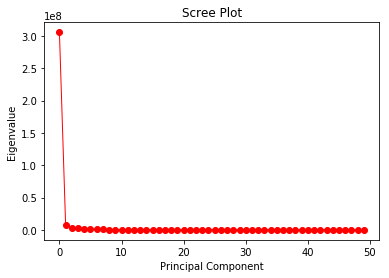

In [48]:
import matplotlib.pyplot as plt
plt.plot(w_sort[:50], 'ro-', linewidth=1)

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [49]:
type(w_sort)
w_arg_sort = np.flip(np.argsort(w))
top = w_arg_sort[:20]
print(top)
#print(w_arg_sort[1114:])

[9999 9998 9997 9996 9995 9994 9993 9992 9991 9990 9989 9988 9987 9986
 9985 9984 9983 9982 9981 9980]


In [39]:
# 5. Show the top 20 ghosts (i.e., eigenfaces) in a 10x10 grid
#topvec.shape

In [40]:
#topvec.shape

In [41]:
#plt.imshow(v[:,-10].reshape(100,100))

In [50]:
topvec = v[:,top].T
#print(topvec)
#print(topvec.size)
print(topvec.shape)
#print(topvec[15].shape)
import matplotlib.pyplot as plt
#plt_portrait(topvec.reshape(-1,100,100),eigenfaces , 100 , 100 , 10 , 2 )
# for i in range (topvec.size-1):
#     plt.imshow(topvec.reshape(-1,100,100)[i])
#lt.imshow(topvec.reshape(20,100,100))
#topvec[1].reshape(100,100),

(20, 10000)


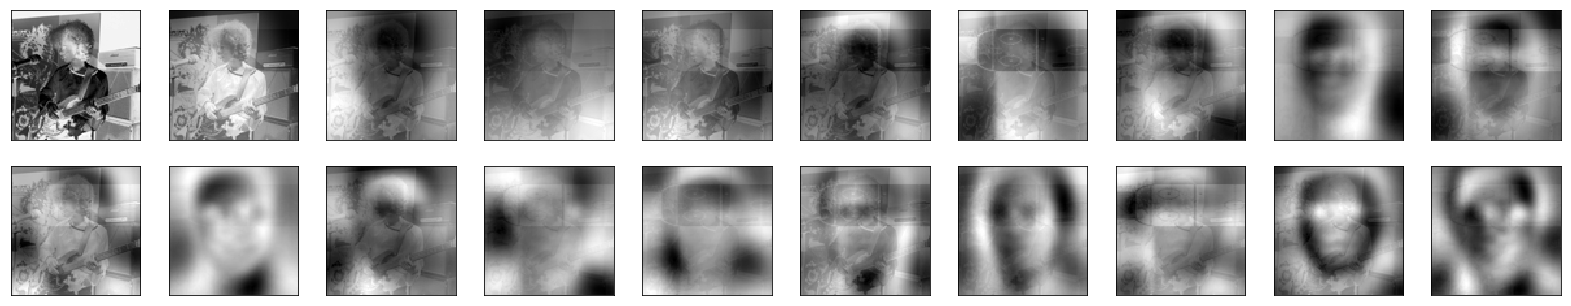

In [51]:
def plot_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        #plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        
plot_portraits(topvec, 100, 100, n_row=2, n_col=10)

In [44]:
#6. Considering the chosen K value above, project the training and test images on to the eigenfaces to 
#reduce the dimensionality

In [52]:
# projectb = transpose of centered matrix  and top20 vector and centered matrix 
print(topvec.T.shape)
print(topvec.shape)
print(cen.T.shape)
print(cen.shape)
#proj = (cen.T). dot (topvec).dot(cen)
# x for gradient descent = proj
proj = cen.dot(topvec.T)
print(proj.shape)
# proj.shape
# proj.size

(10000, 20)
(20, 10000)
(10000, 48262)
(48262, 10000)
(48262, 20)


In [46]:
#cen.min()

In [53]:
# Normalising the projected data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_proj = scaler.fit_transform(proj)

print(type(scaled_proj))
scaled_proj = np.insert(scaled_proj, 0, 1.0, axis=1)
print(scaled_proj)
print(scaled_proj.shape)
#sc_proj =pd.DataFrame(scaled_proj)
#sc_proj['x0']=1
#sc_proj.head()
#sc_proj = np.ndarray(sc_proj)

<class 'numpy.ndarray'>
[[1.         1.         0.10104692 ... 0.49143621 0.4094604  0.54869061]
 [1.         0.99761951 0.06956442 ... 0.49108913 0.4929486  0.45216676]
 [1.         0.99704054 0.0463899  ... 0.58922039 0.58802873 0.46268856]
 ...
 [1.         0.99864403 0.09047407 ... 0.56372095 0.50020492 0.45603588]
 [1.         0.99868167 0.07006635 ... 0.43352166 0.43936749 0.58723357]
 [1.         0.99713863 0.07172305 ... 0.37643792 0.32660828 0.54071937]]
(48262, 21)


In [48]:
#7. Perform Stochastic gradient descent (SGD) based linear regression on the training dataset to learn “age”. Please 
#do a trial-and-error search to tune the hyper-parameters of the SGD based linear regression (e.g., number of epochs, 
#learning rate), and make a note why you select a specific set of hyper-parameters. Once again: Library function that does 
#the linear regression for you will NOT be allowed!


In [54]:
trainy = np.reshape(trainy,(-1,1))
trainy.shape

(48262, 1)

In [55]:
scaled_proj.shape

(48262, 21)

In [56]:
def sgd(x,y,teta, alpha , epoch):
    for g in range(epoch):
        loss_s =0
        for i in range(x.shape[0]):
            #print(x.shape)
            #print(x[i].shape)
            y_pred = np.dot(x[i],teta)
            #print("Weights Shape:" , teta.shape)
            Sum_Squared_error = (y_pred - y[i])**2
            error = y_pred - y[i]
            #print(error.shape)
            #print(x[i].shape)
            j = x[i]*(error)
            #print(j.shape)
            grad = np.reshape(j,(-1,1))
            #print("gradient shape: ",grad.shape)
            teta = teta -(alpha*grad)
            #print(teta.shape)
            loss_s = loss_s + Sum_Squared_error
        #print(loss_s)
    return teta
        
alpha = 0.01
epoch = 20
teta = np.random.rand(21,1)
teta1=sgd(scaled_proj,trainy,teta,alpha, epoch)   

In [57]:
teta1

array([[ 36.69840919],
       [ 40.65320043],
       [ 39.17087346],
       [-53.40221917],
       [-23.44675385],
       [-36.06169342],
       [ 34.50737181],
       [ 24.49461271],
       [ 19.71395723],
       [ -1.64053405],
       [ -6.93417072],
       [-33.98464428],
       [ -7.39090935],
       [  1.98926502],
       [ -1.38601337],
       [  0.59147139],
       [  6.63717889],
       [  2.23649263],
       [-11.70655581],
       [ 11.60981571],
       [ -0.07118541]])

In [58]:
# to do same for test 
te = test
#te = test.astype(np.float32)/255
print(te.shape)

cen_test = te - np.mean(te,axis=0).reshape(1,-1)
#print(cen_test)

f = cen_test.T
cov_test = f.dot(cen_test)
print(cov_test.shape)

cov_test_sc = cov_test/(cen_test.shape[0]-1)
print(cov_test_sc)



(12065, 10000)
(10000, 10000)
[[6766.70150167 6703.10053946 6606.29435999 ... 2245.03589157
  2274.78637818 2327.89127894]
 [6703.10053946 6761.83808313 6689.75933641 ... 2227.24173042
  2257.02936233 2312.56055685]
 [6606.29435999 6689.75933641 6740.41476936 ... 2219.30779176
  2248.4212868  2305.37258317]
 ...
 [2245.03589157 2227.24173042 2219.30779176 ... 5931.59412426
  5807.01846469 5647.15306114]
 [2274.78637818 2257.02936233 2248.4212868  ... 5807.01846469
  5925.272569   5815.47832609]
 [2327.89127894 2312.56055685 2305.37258317 ... 5647.15306114
  5815.47832609 5970.60988624]]


In [59]:
from numpy import linalg as LA
w_test,v_test = LA.eigh(cov_test_sc)
#print(w_test)
#print(v_test)


In [60]:
w_test_sort = -np.sort(-w_test)

w_test_arg_sort = np.flip(np.argsort(w_test))
top_test = w_test_arg_sort[:20]
#print(top_test)

topvec_test = v_test[:,top_test].T
print(topvec_test.shape)



(20, 10000)


In [62]:
proj_test = cen_test.dot(topvec_test.T)
#print(proj_test)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled_proj_test = scale.fit_transform(proj_test)
print(scaled_proj_test)

[[0.66367341 0.30607237 0.5507058  ... 0.59484897 0.48439059 0.32707646]
 [0.52963391 0.28352518 0.45225896 ... 0.37084203 0.42939423 0.48818639]
 [1.         0.56740579 0.53060899 ... 0.53657539 0.45939801 0.49038101]
 ...
 [0.58705988 0.25808211 0.5931765  ... 0.51064371 0.42738201 0.30730734]
 [1.         0.56740579 0.53060899 ... 0.53657539 0.45939801 0.49038101]
 [0.47082568 0.58605332 0.59891113 ... 0.47870214 0.32631087 0.57764838]]


In [63]:
print(proj_test)

[[ 9.99276911e+02 -2.60156563e+03  3.38885886e+02 ...  3.22444609e+02
   1.10266662e+02 -6.66579789e+02]
 [-2.40244948e+03 -2.93260677e+03 -1.25416736e+03 ... -7.44781215e+02
  -1.38136703e+02  4.01662851e+01]
 [ 9.53475383e+03  1.23537049e+03  1.36819849e+01 ...  4.48145478e+01
  -2.61791837e+00  4.97935125e+01]
 ...
 [-9.45062378e+02 -3.30616581e+03  1.02614079e+03 ... -7.87305895e+01
  -1.47225385e+02 -7.53301605e+02]
 [ 9.53475383e+03  1.23537049e+03  1.36819849e+01 ...  4.48145478e+01
  -2.61791837e+00  4.97935125e+01]
 [-3.89491626e+03  1.50915637e+03  1.11893781e+03 ... -2.30908283e+02
  -6.03735812e+02  4.32612090e+02]]


In [65]:
scaled_proj_test = np.insert(scaled_proj_test, 0, 1.0, axis=1)
print(scaled_proj_test)
print(scaled_proj_test.shape)

[[1.         0.66367341 0.30607237 ... 0.59484897 0.48439059 0.32707646]
 [1.         0.52963391 0.28352518 ... 0.37084203 0.42939423 0.48818639]
 [1.         1.         0.56740579 ... 0.53657539 0.45939801 0.49038101]
 ...
 [1.         0.58705988 0.25808211 ... 0.51064371 0.42738201 0.30730734]
 [1.         1.         0.56740579 ... 0.53657539 0.45939801 0.49038101]
 [1.         0.47082568 0.58605332 ... 0.47870214 0.32631087 0.57764838]]
(12065, 21)


In [66]:

y_pred = scaled_proj_test.dot(teta1)
print(y_pred)
testy.shape

[[37.29360715]
 [44.49040445]
 [63.85252016]
 ...
 [42.73046823]
 [63.85252016]
 [31.99748734]]


(12065,)

In [67]:
#8. Predict the test dataset (from step 2) based on the learned model in step 7, and report Root Mean Square Error (RMSE).

In [67]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(testy,y_pred)
print("MSE is " , MSE)
#Calculating RMSE
RMSE = math.sqrt(MSE)
print("RMSE is ", RMSE )


MSE is  776.635732792034
RMSE is  27.868184956900834


In [62]:
#9.  From Canvas download the wiki_judge_images.zip (md5sum: 551a46ee18286824ad03d9110750da01) containing 2001 facial
# images (1.png, 2.png, …, 2001.png) of resolution 100x100. You can obtain another meta file, wiki_judgeX.mat
# (md5sum: b7382fd03b8fc05575bb5701c0eec25b) from Canvas containing some information about the images. However, 
# the information does not include “age” field. Using your best regression model, predict age of each of the 2001 
# facial image, and prepare a submission.csv file with the following CSV format:

In [38]:
metaData1 =loadmat("wiki_judgeX.mat",squeeze_me=True, struct_as_record=True)

full_path_wiki = metaData1['wiki_judgeX']['full_path'].item(0)
type(full_path)
ID = metaData1['wiki_judgeX']['ID'].item(0)
images_wiki =[]
#print(type(images_wiki))
for i in np.nditer(full_path_wiki.size):
    images_wiki= full_path_wiki
 
    
import glob
import cv2
from scipy.misc import imread
import os 
imag_wiki = images_wiki.tolist()
image1_wiki = []

im_wiki = os.getcwd()+"\\wiki_judge_images"
#print(os.path.join(os.getcwd(),imag))
for i in imag_wiki:
    image1_wiki.append(os.path.join(im_wiki,i).replace("/","\\"))

images2_wiki =[stats.misc.imread(file) for file in (image1_wiki)]

print(images2_wiki)

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


[array([[ 89, 107, 118, ...,  92, 116,  92],
       [ 93,  80,  90, ...,  81,  94,  77],
       [ 87,  83,  97, ...,  89,  89,  75],
       ...,
       [ 63,  63,  46, ...,  62,  80,  74],
       [ 50,  32,  29, ...,  65,  72,  74],
       [ 25,  21,  27, ...,  49,  67,  78]], dtype=uint8), array([[161, 161, 161, ..., 104, 104, 104],
       [161, 161, 161, ..., 104, 104, 104],
       [161, 161, 161, ..., 104, 104, 104],
       ...,
       [107, 107, 107, ..., 109, 109, 109],
       [106, 106, 106, ..., 108, 108, 108],
       [ 96,  96,  96, ..., 114, 114, 114]], dtype=uint8), array([[231, 231, 230, ..., 221, 223, 223],
       [231, 232, 230, ..., 221, 221, 223],
       [232, 232, 230, ..., 221, 221, 223],
       ...,
       [223, 223, 221, ..., 220, 221, 220],
       [223, 222, 223, ..., 222, 222, 221],
       [223, 222, 221, ..., 223, 224, 224]], dtype=uint8), array([[ 44,  44,  43, ...,  62,  61,  64],
       [ 43,  43,  43, ...,  62,  60,  63],
       [ 41,  39,  40, ...,  68,  63, 

In [41]:
a_wiki=np.array(images2_wiki)
print(type(a_wiki))
#print(a.size)
#print(len(a))
print(a_wiki[1].shape)
print(a_wiki.shape)


c_wiki=np.empty([2001,10000])
#print(c.shape)
for i in np.nditer(a_wiki.size):
    c_wiki=np.reshape(a_wiki,(2001,10000))
     #c= a.flatten()
print(c_wiki.shape)


<class 'numpy.ndarray'>
(100, 100)
(2001, 100, 100)
(2001, 10000)


In [42]:

#tr_wiki = c_wiki.astype(np.float32)/255

#cen_wiki = tr_wiki - np.mean(tr_wiki,axis=0).reshape(1,-1)
#print(cen_test)
cen_wiki = c_wiki - np.mean(c_wiki,axis=0).reshape(1,-1)
f_wiki = cen_wiki.T
cov_wiki = f_wiki.dot(cen_wiki)
print(cov_wiki.shape)

cov_wiki_sc = cov_wiki/(cen_wiki.shape[0]-1)
print(cov_wiki_sc)

(10000, 10000)
[[6755.99078161 6673.23686207 6607.7877931  ... 2019.56117816
  2053.74794253 2067.22167816]
 [6673.23686207 6729.10626987 6683.2022961  ... 1999.19352099
  2031.1523081  2044.46599925]
 [6607.7877931  6683.2022961  6748.8189985  ... 1982.92916192
  2020.96373388 2033.48892279]
 ...
 [2019.56117816 1999.19352099 1982.92916192 ... 5869.85884608
  5746.0244073  5558.43467216]
 [2053.74794253 2031.1523081  2020.96373388 ... 5746.0244073
  5833.15984758 5679.56371164]
 [2067.22167816 2044.46599925 2033.48892279 ... 5558.43467216
  5679.56371164 5812.89710695]]


In [43]:
from numpy import linalg as LA
w_wiki,v_wiki = LA.eigh(cov_wiki_sc)
v_wiki.shape

(10000, 10000)

In [44]:
w_wiki_sort = -np.sort(-w_wiki)

w_wiki_arg_sort = np.flip(np.argsort(w_wiki))
top_wiki = w_wiki_arg_sort[:20]
#print(top_test)

topvec_wiki = v_wiki[:,top_wiki].T
print(topvec_wiki.shape)

# topvec_wikiT = topvec_wiki.T
# print(topvec_wikiT.shape)


(20, 10000)


In [46]:
proj_wiki = cen_wiki.dot(topvec_wiki.T)
#print(proj_test)

from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
scaled_proj_wiki = scal.fit_transform(proj_wiki)
print(scaled_proj_wiki)



[[0.60526535 0.46623106 0.60457703 ... 0.37154689 0.45873804 0.52427413]
 [0.4451379  0.51112089 0.56015538 ... 0.47384324 0.56257702 0.67657628]
 [0.32147335 0.69580206 0.22874063 ... 0.43318607 0.52433714 0.28499326]
 ...
 [0.49967468 0.30271299 0.54822475 ... 0.50221447 0.47328165 0.1904654 ]
 [0.4546632  0.46056393 0.62596215 ... 0.35509297 0.54046203 0.34062484]
 [0.50270482 0.4882451  0.49432392 ... 0.39339056 0.52047085 0.48182501]]


In [47]:
scaled_proj_wiki = np.insert(scaled_proj_wiki, 0, 1.0, axis=1)
print(scaled_proj_wiki)
print(scaled_proj_wiki.shape)

[[1.         0.60526535 0.46623106 ... 0.37154689 0.45873804 0.52427413]
 [1.         0.4451379  0.51112089 ... 0.47384324 0.56257702 0.67657628]
 [1.         0.32147335 0.69580206 ... 0.43318607 0.52433714 0.28499326]
 ...
 [1.         0.49967468 0.30271299 ... 0.50221447 0.47328165 0.1904654 ]
 [1.         0.4546632  0.46056393 ... 0.35509297 0.54046203 0.34062484]
 [1.         0.50270482 0.4882451  ... 0.39339056 0.52047085 0.48182501]]
(2001, 21)


In [48]:
y_pred_wiki = scaled_proj_wiki.dot(teta1)
print(y_pred_wiki)

[[42.18839983]
 [36.73595184]
 [60.38763821]
 ...
 [10.57572397]
 [40.99628342]
 [37.43919594]]


In [49]:

y_wiki =pd.DataFrame(y_pred_wiki)
#y_wiki.shape
y_wiki.columns =['age']

y_wik = ID
print(y_wik)
#y_wiki['ID']= y_wik
y_wiki.insert(0,'ID',y_wik)
header =['ID', 'age']
print(y_wiki)
# #Copying it to the CSV file
y_wiki.to_csv("file1.csv" , columns = header , index = False)

[   1    2    3 ... 1999 2000 2001]
        ID        age
0        1  42.188400
1        2  36.735952
2        3  60.387638
3        4  58.644993
4        5  30.990441
5        6  43.606809
6        7  56.932046
7        8  39.587510
8        9  48.931847
9       10  68.170050
10      11  68.170050
11      12  41.599874
12      13  49.271413
13      14  64.993416
14      15  29.031308
15      16  52.351907
16      17  43.552569
17      18  68.170050
18      19  52.173583
19      20  69.218957
20      21  68.170050
21      22  43.142684
22      23  54.517246
23      24  24.908609
24      25  47.949815
25      26  40.700346
26      27  45.927299
27      28  24.761222
28      29  57.873299
29      30   9.725626
...    ...        ...
1971  1972  52.723128
1972  1973  34.427753
1973  1974  53.964547
1974  1975  37.049412
1975  1976  49.072181
1976  1977  57.304263
1977  1978  68.170050
1978  1979  66.575030
1979  1980  23.458089
1980  1981  42.320455
1981  1982  48.215030
1982  1983  62.497

In [72]:
#10. Repeat steps 2-8 four more times, and report average RMSE and standard deviation of the RMSE. Please make sure
#in step 2 you are actually randomly shuffling the dataset before splitting it every time.

In [73]:
import gc
gc.collect()

25833

In [ ]:
gc.collect()
from sklearn.preprocessing import MinMaxScaler
scale4 = MinMaxScaler()
scaled_proj_test4 = scale4.fit_transform(proj_test4)
gc.collect()
scaled_proj_test4 = np.insert(scaled_proj_test4, 0, 1.0, axis=1)
gc.collect()
y_pred4 = scaled_proj_test4.dot(teta4)
gc.collect()

from sklearn.metrics import mean_squared_error
import math
MSE4 = mean_squared_error(testy4,y_pred4)
print("MSE4 is " , MSE4)
gc.collect()
#Calculating RMSE
RMSE4 = math.sqrt(MSE4)
print("RMSE4 is ", RMSE4 )
gc.collect()

In [81]:

RMSE1 = 29.22
RMSE2 = 26.29
RMSE3 = 29.64
RMSE4 = 27.86
RMSEs = [RMSE1,RMSE2,RMSE3,RMSE4]
RMSEs1 = pd.DataFrame(RMSEs)
#print(type(RMSEs1))

avgRMSE = np.mean(RMSEs1)
print("Average RMSE is :" , avgRMSE)

Average RMSE is : 0    28.2525
dtype: float64


In [ ]:
#standard deviation

In [84]:
StdRMSE = np.std(RMSEs1)
print("standard deviation is :" , StdRMSE)


standard deviation is : 0    1.310217
dtype: float64


In [ ]:
#11.Draw a plot (K vs RMSE) after experimenting with steps 2-8 by varying values of K. The maximum value K can take is 
#100x100 = 10000, so please draw the plot for the K values from the set {2, 10, 20, 40, 50, 60, 80, 100, 200}.

In [ ]:
#k=2

In [50]:

k2top = w_arg_sort[:2]
k2topvec = v_test[:,k2top].T
k2proj = cen.dot(k2topvec.T)



In [51]:
from sklearn.preprocessing import MinMaxScaler
k2scaler = MinMaxScaler()
k2scaled_proj = k2scaler.fit_transform(k2proj)
k2scaled_proj = np.insert(k2scaled_proj, 0, 1.0, axis=1)


In [52]:
k2alpha = 0.01
k2epoch = 20
k2teta = np.random.rand(3,1)
k2teta1=sgd(k2scaled_proj,trainy,k2teta,k2alpha,k2epoch) 


In [53]:

k2top_test = w_test_arg_sort[:2]
#print(top_test)

k2topvec_test = v_test[:,k2top_test].T

In [54]:
k2proj_test = cen_test.dot(k2topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k2scale = MinMaxScaler()
k2scaled_proj_test = scale.fit_transform(k2proj_test)

In [55]:
k2scaled_proj_test = np.insert(k2scaled_proj_test, 0, 1.0, axis=1)

In [56]:
k2y_pred = k2scaled_proj_test.dot(k2teta1)

In [57]:
from sklearn.metrics import mean_squared_error
import math
k2MSE = mean_squared_error(testy,k2y_pred)
print("k2MSE is " , k2MSE)
#Calculating RMSE
k2RMSE = math.sqrt(k2MSE)
print("k2RMSE is ", k2RMSE )

k2MSE is  478.5457371457258
k2RMSE is  21.875688266788906


In [ ]:
#k =10

In [58]:
k10top = w_arg_sort[:10]
k10topvec = v_test[:,k10top].T
k10proj = cen.dot(k10topvec.T)

In [59]:
from sklearn.preprocessing import MinMaxScaler
k10scaler = MinMaxScaler()
k10scaled_proj = k10scaler.fit_transform(k10proj)
k10scaled_proj = np.insert(k10scaled_proj, 0, 1.0, axis=1)

In [60]:
k10alpha = 0.01
k10epoch = 20
k10teta = np.random.rand(11,1)
k10teta1=sgd(k10scaled_proj,trainy,k10teta,k10alpha,k10epoch) 

In [61]:

k10top_test = w_test_arg_sort[:10]
#print(top_test)

k10topvec_test = v_test[:,k10top_test].T

In [62]:
k10proj_test = cen_test.dot(k10topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k10scale = MinMaxScaler()
k10scaled_proj_test = scale.fit_transform(k10proj_test)

In [63]:
k10scaled_proj_test = np.insert(k10scaled_proj_test, 0, 1.0, axis=1)
k10y_pred = k10scaled_proj_test.dot(k10teta1)

In [64]:
from sklearn.metrics import mean_squared_error
import math
k10MSE = mean_squared_error(testy,k10y_pred)
print("k10MSE is " , k10MSE)
#Calculating RMSE
k10RMSE = math.sqrt(k10MSE)
print("k10RMSE is ", k10RMSE )

k10MSE is  695.9035240567317
k10RMSE is  26.379983397582563


In [ ]:
#k =40

In [65]:
k40top = w_arg_sort[:40]
k40topvec = v_test[:,k40top].T
k40proj = cen.dot(k40topvec.T)

In [66]:
from sklearn.preprocessing import MinMaxScaler
k40scaler = MinMaxScaler()
k40scaled_proj = k40scaler.fit_transform(k40proj)
k40scaled_proj = np.insert(k40scaled_proj, 0, 1.0, axis=1)

In [67]:
k40alpha = 0.01
k40epoch = 20
k40teta = np.random.rand(41,1)
k40teta1=sgd(k40scaled_proj,trainy,k40teta,k40alpha,k40epoch) 

In [68]:
k40top_test = w_test_arg_sort[:40]
#print(top_test)

k40topvec_test = v_test[:,k40top_test].T

In [69]:
k40proj_test = cen_test.dot(k40topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k40scale = MinMaxScaler()
k40scaled_proj_test = scale.fit_transform(k40proj_test)

In [70]:
k40scaled_proj_test = np.insert(k40scaled_proj_test, 0, 1.0, axis=1)
k40y_pred = k40scaled_proj_test.dot(k40teta1)

In [71]:
from sklearn.metrics import mean_squared_error
import math
k40MSE = mean_squared_error(testy,k40y_pred)
print("k40MSE is " , k40MSE)
#Calculating RMSE
k40RMSE = math.sqrt(k40MSE)
print("k40RMSE is ", k40RMSE )

k40MSE is  673.6024342605772
k40RMSE is  25.953852011995775


In [ ]:
#k = 50

In [72]:
k50top = w_arg_sort[:50]
k50topvec = v_test[:,k50top].T
k50proj = cen.dot(k50topvec.T)

In [73]:
from sklearn.preprocessing import MinMaxScaler
k50scaler = MinMaxScaler()
k50scaled_proj = k50scaler.fit_transform(k50proj)
k50scaled_proj = np.insert(k50scaled_proj, 0, 1.0, axis=1)

In [74]:
k50alpha = 0.01
k50epoch = 20
k50teta = np.random.rand(51,1)
k50teta1=sgd(k50scaled_proj,trainy,k50teta,k50alpha,k50epoch) 

In [75]:
k50top_test = w_test_arg_sort[:50]
#print(top_test)

k50topvec_test = v_test[:,k50top_test].T

In [76]:
k50proj_test = cen_test.dot(k50topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k50scale = MinMaxScaler()
k50scaled_proj_test = scale.fit_transform(k50proj_test)

In [77]:
k50scaled_proj_test = np.insert(k50scaled_proj_test, 0, 1.0, axis=1)
k50y_pred = k50scaled_proj_test.dot(k50teta1)

In [78]:
from sklearn.metrics import mean_squared_error
import math
k50MSE = mean_squared_error(testy,k50y_pred)
print("k50MSE is " , k50MSE)
#Calculating RMSE
k50RMSE = math.sqrt(k50MSE)
print("k50RMSE is ", k50RMSE )

k50MSE is  671.7947548617291
k50RMSE is  25.919003739760697


In [ ]:
# k = 60

In [79]:
k60top = w_arg_sort[:60]
k60topvec = v_test[:,k60top].T
k60proj = cen.dot(k60topvec.T)

In [80]:
from sklearn.preprocessing import MinMaxScaler
k60scaler = MinMaxScaler()
k60scaled_proj = k60scaler.fit_transform(k60proj)
k60scaled_proj = np.insert(k60scaled_proj, 0, 1.0, axis=1)

In [81]:
k60alpha = 0.01
k60epoch = 20
k60teta = np.random.rand(61,1)
k60teta1=sgd(k60scaled_proj,trainy,k60teta,k60alpha,k60epoch) 

In [82]:
k60top_test = w_test_arg_sort[:60]
#print(top_test)

k60topvec_test = v_test[:,k60top_test].T

In [83]:
k60proj_test = cen_test.dot(k60topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k60scale = MinMaxScaler()
k60scaled_proj_test = scale.fit_transform(k60proj_test)

In [84]:
k60scaled_proj_test = np.insert(k60scaled_proj_test, 0, 1.0, axis=1)
k60y_pred = k60scaled_proj_test.dot(k60teta1)

In [85]:
from sklearn.metrics import mean_squared_error
import math
k60MSE = mean_squared_error(testy,k60y_pred)
print("k60MSE is " , k60MSE)
#Calculating RMSE
k60RMSE = math.sqrt(k60MSE)
print("k60RMSE is ", k60RMSE )

k60MSE is  691.1878504785022
k60RMSE is  26.290451697878876


In [ ]:
#K= 80

In [86]:
k80top = w_arg_sort[:80]
k80topvec = v_test[:,k80top].T
k80proj = cen.dot(k80topvec.T)

In [87]:
from sklearn.preprocessing import MinMaxScaler
k80scaler = MinMaxScaler()
k80scaled_proj = k80scaler.fit_transform(k80proj)
k80scaled_proj = np.insert(k80scaled_proj, 0, 1.0, axis=1)

In [88]:
k80alpha = 0.01
k80epoch = 20
k80teta = np.random.rand(81,1)
k80teta1=sgd(k80scaled_proj,trainy,k80teta,k80alpha,k80epoch)

In [89]:
k80top_test = w_test_arg_sort[:80]
#print(top_test)

k80topvec_test = v_test[:,k80top_test].T

In [90]:
k80proj_test = cen_test.dot(k80topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k80scale = MinMaxScaler()
k80scaled_proj_test = scale.fit_transform(k80proj_test)

In [91]:
k80scaled_proj_test = np.insert(k80scaled_proj_test, 0, 1.0, axis=1)
k80y_pred = k80scaled_proj_test.dot(k80teta1)

In [92]:
from sklearn.metrics import mean_squared_error
import math
k80MSE = mean_squared_error(testy,k80y_pred)
print("k80MSE is " , k80MSE)
#Calculating RMSE
k80RMSE = math.sqrt(k80MSE)
print("k80RMSE is ", k80RMSE )

k80MSE is  680.4226892970971
k80RMSE is  26.084913059028914


In [ ]:
# K=100

In [93]:
gc.collect()
k100top = w_arg_sort[:100]
k100topvec = v_test[:,k100top].T
gc.collect()
m= k100topvec.T
gc.collect()



0

In [94]:
gc.collect()
gc.collect()
gc.collect()
k100proj = cen.dot(m)
gc.collect()

0

In [95]:
from sklearn.preprocessing import MinMaxScaler
k100scaler = MinMaxScaler()
k100scaled_proj = k100scaler.fit_transform(k100proj)
k100scaled_proj = np.insert(k100scaled_proj, 0, 1.0, axis=1)

In [96]:
k100alpha = 0.01
k100epoch = 20
k100teta = np.random.rand(101,1)
k100teta1=sgd(k100scaled_proj,trainy,k100teta,k100alpha,k100epoch)

In [97]:
k100top_test = w_test_arg_sort[:100]
#print(top_test)

k100topvec_test = v_test[:,k100top_test].T

In [98]:
k100proj_test = cen_test.dot(k100topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k100scale = MinMaxScaler()
k100scaled_proj_test = scale.fit_transform(k100proj_test)

In [99]:
k100scaled_proj_test = np.insert(k100scaled_proj_test, 0, 1.0, axis=1)
k100y_pred = k100scaled_proj_test.dot(k100teta1)

In [100]:
from sklearn.metrics import mean_squared_error
import math
k100MSE = mean_squared_error(testy,k100y_pred)
print("k100MSE is " , k100MSE)
#Calculating RMSE
k100RMSE = math.sqrt(k100MSE)
print("k100RMSE is ", k100RMSE )

k100MSE is  694.017221875822
k100RMSE is  26.34420660934434


In [ ]:
# K= 200

In [101]:
gc.collect()
k200top = w_arg_sort[:200]
k200topvec = v_test[:,k200top].T


In [102]:
gc.collect()
k200proj = cen.dot(k200topvec.T)
gc.collect()

0

In [103]:
gc.collect()
from sklearn.preprocessing import MinMaxScaler
k200scaler = MinMaxScaler()
k200scaled_proj = k200scaler.fit_transform(k200proj)
k200scaled_proj = np.insert(k200scaled_proj, 0, 1.0, axis=1)

In [104]:
k200alpha = 0.01
k200epoch = 20
k200teta = np.random.rand(201,1)
k200teta1=sgd(k200scaled_proj,trainy,k200teta,k200alpha,k200epoch)

In [105]:
k200top_test = w_test_arg_sort[:200]
#print(top_test)

k200topvec_test = v_test[:,k200top_test].T

In [106]:
k200proj_test = cen_test.dot(k200topvec_test.T)

from sklearn.preprocessing import MinMaxScaler
k200scale = MinMaxScaler()
k200scaled_proj_test = scale.fit_transform(k200proj_test)

In [107]:
k200scaled_proj_test = np.insert(k200scaled_proj_test, 0, 1.0, axis=1)
k200y_pred = k200scaled_proj_test.dot(k200teta1)

In [108]:
from sklearn.metrics import mean_squared_error
import math
k200MSE = mean_squared_error(testy,k200y_pred)
print("k200MSE is " , k200MSE)
#Calculating RMSE
k200RMSE = math.sqrt(k200MSE)
print("k200RMSE is ", k200RMSE )

k200MSE is  963.5276647892381
k200RMSE is  31.04074201415356


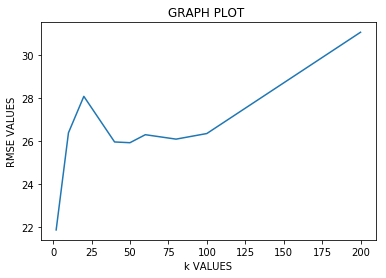

In [109]:
#k = 2 , 10 , 20,40,50,60,80 and 100 and 200
import numpy as np
#K2RMSE=28
X = [2,10,20,40, 50, 60, 80, 100,200]
Y = [k2RMSE,k10RMSE,RMSE,k40RMSE,k50RMSE,k60RMSE,k80RMSE,k100RMSE,k200RMSE]
#X-AXIS = [2,10,20,40, 50, 60, 80, 100, 200]
#Y-AXIS = ['K2RMSE','K10RMSE','RMSE','K40RMSE','K50RMSE','K60RMSE','K80RMSE',30,31]

import matplotlib.pyplot as plt
plt.xlabel('k VALUES')
plt.ylabel('RMSE VALUES')
plt.title("GRAPH PLOT ")
plt.plot(X, Y)
plt.show()

In [ ]:
#12.Submit submission.csv into Kaggle ( https://www.kaggle.com/c/csci-ml-s19-pa2  ). During submission of your entry, 
#please mention your model parameters, including K, learning rates, epochs, and ofcourse your student ID and/or your full
#name.

In [ ]:

#kushal ganti 
#score was 28.055

In [ ]:
#13.Identify and discard outliers from the given dataset, and repeat steps 2-9.

In [85]:
print(dat2.isnull().sum())

dat2.isnull()



ID                       0
dob                      0
dob_str                  0
photo_taken              0
full_path                0
gender                2553
name                     0
face_location            0
face_score               0
second_face_score    56364
age                      0
dtype: int64


,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


In [185]:
dat2

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,2002,723671,05-May-1981,2009,17/10000217_1981-05-05_2009.png,1,Sami Jauhojärvi,"[111.29109473290997, 111.29109473290997, 252.6...",4.30096,NaN,27.7461
1,2003,711677,03-Jul-1948,2008,12/100012_1948-07-03_2008.png,1,Marc Okrand,"[113.52, 169.83999999999997, 366.08, 422.4]",4.32933,NaN,59.5822
2,2004,705061,23-May-1930,1961,65/10001965_1930-05-23_1961.png,1,Aleksandar Matanović,"[1, 1, 634, 440]",-inf,NaN,30.6968
3,2005,720044,31-May-1971,2012,16/10002116_1971-05-31_2012.png,0,Diana Damrau,"[171.61031405173117, 75.57451239763239, 266.76...",3.40844,NaN,40.6721
4,2006,716189,09-Nov-1960,2012,02/10002702_1960-11-09_2012.png,0,Krista Tippett,"[274.76563240288175, 57.7700900839337, 376.886...",4.74806,NaN,51.2242
5,2007,707745,27-Sep-1937,1971,41/10003541_1937-09-27_1971.png,1,Bernie Whitebear,"[79.35580188693945, 26.65993396231315, 197.609...",4.18483,NaN,33.347
6,2008,695763,07-Dec-1904,1982,39/100039_1904-12-07_1982.png,1,Clarence Nash,"[152.9073113210374, 95.90456957564838, 323.015...",3.00635,1.10334,77.1491
7,2009,711000,26-Aug-1946,2007,13/10004113_1946-08-26_2007.png,1,William W. Destler,"[1, 1, 1, 1]",-inf,NaN,60.4358
8,2010,723987,17-Mar-1982,2011,22/10004122_1982-03-17_2011.png,1,Daniel Smith,"[1, 1, 592, 440]",-inf,NaN,28.8772
9,2011,697114,19-Aug-1908,1950,99/10004299_1908-08-19_1950.png,1,Carl Greenberg,"[107.58644628233198, 107.58644628233198, 298.7...",4.52666,NaN,41.455


In [186]:
dat3 = dat2.drop(columns=['second_face_score'])

In [187]:
iage = dat3[ dat3['age'] > 100 ].index
 
# Delete these row indexes from dataFrame
dat3.drop(iage, inplace=True)
len(dat3)

59837

In [188]:
i0age = dat3[ dat3['age'] == 0 ].index
 
# Delete these row indexes from dataFrame
dat3.drop(i0age, inplace=True)
len(dat3)

58504

In [198]:

fscore = dat3[ dat3['face_score']  == ("%-inf%")].index
print(fscore.values)
# Delete these row indexes from dataFrame
dat3.drop(fscore, inplace=True)
len(dat3)

[]


58504

In [190]:
dat3

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,age
0,2002,723671,05-May-1981,2009,17/10000217_1981-05-05_2009.png,1,Sami Jauhojärvi,"[111.29109473290997, 111.29109473290997, 252.6...",4.30096,27.7461
1,2003,711677,03-Jul-1948,2008,12/100012_1948-07-03_2008.png,1,Marc Okrand,"[113.52, 169.83999999999997, 366.08, 422.4]",4.32933,59.5822
2,2004,705061,23-May-1930,1961,65/10001965_1930-05-23_1961.png,1,Aleksandar Matanović,"[1, 1, 634, 440]",-inf,30.6968
3,2005,720044,31-May-1971,2012,16/10002116_1971-05-31_2012.png,0,Diana Damrau,"[171.61031405173117, 75.57451239763239, 266.76...",3.40844,40.6721
4,2006,716189,09-Nov-1960,2012,02/10002702_1960-11-09_2012.png,0,Krista Tippett,"[274.76563240288175, 57.7700900839337, 376.886...",4.74806,51.2242
5,2007,707745,27-Sep-1937,1971,41/10003541_1937-09-27_1971.png,1,Bernie Whitebear,"[79.35580188693945, 26.65993396231315, 197.609...",4.18483,33.347
6,2008,695763,07-Dec-1904,1982,39/100039_1904-12-07_1982.png,1,Clarence Nash,"[152.9073113210374, 95.90456957564838, 323.015...",3.00635,77.1491
7,2009,711000,26-Aug-1946,2007,13/10004113_1946-08-26_2007.png,1,William W. Destler,"[1, 1, 1, 1]",-inf,60.4358
8,2010,723987,17-Mar-1982,2011,22/10004122_1982-03-17_2011.png,1,Daniel Smith,"[1, 1, 592, 440]",-inf,28.8772
9,2011,697114,19-Aug-1908,1950,99/10004299_1908-08-19_1950.png,1,Carl Greenberg,"[107.58644628233198, 107.58644628233198, 298.7...",4.52666,41.455


In [143]:
dat4 = dat3[:500]
print(dat4.shape)
dat5= dat4['age']
dat5

(500, 10)


0      27.7461
1      59.5822
2      30.6968
3      40.6721
4      51.2242
5       33.347
6      77.1491
7      60.4358
8      28.8772
9       41.455
10     35.6436
11      22.716
12     28.0466
13      37.608
14     24.8185
15      31.824
16     36.4605
17     18.6299
18     77.5712
19     50.7023
20     41.8607
21     30.2269
22     33.0027
23     27.8443
24     33.3416
25     29.1683
26     59.4073
27     12.6858
28     26.6107
30     60.0916
        ...   
494    62.8607
495    21.0712
496    20.8388
497    46.8158
498    28.0822
500    67.2664
501    22.6628
502     18.074
503    25.9495
504    71.7911
506    20.1749
507    26.7774
508    22.7269
510    19.9578
511    60.3185
512    56.5301
513    78.1463
514    24.4046
515    66.5861
516     29.108
517    37.3295
518    28.4687
519    25.2884
520    69.5384
521    23.0384
522    53.2269
524    19.0466
525    25.4018
526    42.7215
527    30.7719
Name: age, Length: 500, dtype: object

In [94]:

images_new =[]
full_path_new = dat4['full_path']
for i in np.nditer(500):
    images_new = full_path_new
type(images_new)
images_new.shape
# np.where(images_new == '63/670663_2015-02-16UTC08:04_1941.png')
# print(images_new[4974])
# images_new[4974] = '63/670663_2015-02-16UTC08_04_1941.png'
# print(images_new[4974])

(500,)

In [95]:
import glob
import cv2
from scipy.misc import imread
import os 
imag_new = images_new.tolist()
image1_new = []
#print(type(imag))
#print(os.getcwd()+"\\wiki_labeled")
im_new = os.getcwd()+"\\wiki_labeled"
gc.collect()
#print(os.path.join(os.getcwd(),imag))
for i in imag_new:
    image1_new.append(os.path.join(im,i).replace("/","\\"))

images2_new =[stats.misc.imread(file) for file in (image1_new)]

images2_new

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


[array([[255, 255, 255, ...,  81,  75,  80],
        [255, 255, 255, ...,  81,  75,  80],
        [255, 255, 255, ...,  79,  76,  81],
        ...,
        [246, 209, 169, ...,  63,  59,  58],
        [173, 178, 183, ...,  64,  58,  55],
        [176, 175, 147, ...,  65,  60,  54]], dtype=uint8),
 array([[102, 100,  99, ..., 112, 112, 111],
        [100, 100, 101, ..., 112, 110, 112],
        [101, 100, 101, ..., 111, 111, 110],
        ...,
        [ 25,  25,  23, ...,  29,  32,  38],
        [ 26,  25,  24, ...,  27,  27,  30],
        [ 28,  27,  27, ...,  27,  27,  29]], dtype=uint8),
 array([[177, 175, 173, ..., 146, 165, 186],
        [173, 171, 170, ..., 143, 164, 188],
        [171, 171, 169, ..., 149, 167, 189],
        ...,
        [246, 244, 244, ..., 227, 228, 230],
        [246, 247, 246, ..., 227, 227, 226],
        [246, 246, 246, ..., 194, 201, 207]], dtype=uint8),
 array([[ 44,  44,  44, ..., 108, 118, 102],
        [ 44,  44,  44, ...,  77, 111, 112],
        [ 44,  4

In [96]:
print(len(images2_new))
gc.collect()

500


0

In [97]:
gc.collect()
gc.collect()
a_new=np.array(images2_new)
print(type(a_new))

print(a_new.shape)


c_new=np.empty([500,10000])
#print(c.shape)
for i in np.nditer(a_new.size):
    c_new=np.reshape(a_new,(500,10000))
     
print(c_new.shape)

<class 'numpy.ndarray'>
(500, 100, 100)
(500, 10000)


In [98]:
from sklearn.model_selection import train_test_split
#train_test_split will randomly split the data 

test_new,train_new , testy_new, trainy_new  =train_test_split(c_new,dat5,test_size=0.8) 

print(train_new.size)
print(train_new.shape)

4000000
(400, 10000)


In [99]:
print(trainy_new.shape)
print(test_new.shape)
#trainy_new = np.reshape(trainy_new,(-1,1))
print(testy_new.shape)
print(trainy_new.shape)

(400,)
(100, 10000)
(100,)
(400,)


In [100]:
trainy_new1 = np.asarray(trainy_new)

In [101]:
trainy_new1 = np.reshape(trainy_new1,(-1,1))

In [102]:
import gc
gc.collect()
tr_new =train_new

In [103]:
cen_new = tr_new - np.mean(tr_new,axis=0).reshape(1,-1)
cen_new

array([[157.4575, 162.845 , 117.3475, ...,   5.585 ,   3.6725,   3.075 ],
       [-13.5425, -13.155 , -11.6525, ..., -87.415 , -87.3275, -86.925 ],
       [-86.5425, -78.155 , -61.6525, ...,  26.585 ,  16.6725,  -7.925 ],
       ...,
       [  7.4575,   4.845 ,   6.3475, ...,  21.585 ,  21.6725,  22.075 ],
       [100.4575,  77.845 ,  55.3475, ..., -46.415 , -46.3275, -54.925 ],
       [141.4575, 141.845 , 143.3475, ..., -28.415 , -37.3275, -63.925 ]])

In [104]:
cen_new.shape

(400, 10000)

In [105]:
import gc
gc.collect()
e_new=cen_new.T
e_new.shape
gc.collect()

0

In [106]:
d_new = cen_new.dot(e_new)

In [107]:
scaled_new = d_new/(cen_new.shape[0]-1)

In [108]:
import gc
gc.collect()

from numpy import linalg as LA
w_new ,v_new = LA.eigh(scaled_new)
print(w_new)
print(v_new)

[-8.30828531e-11 -3.04768561e-11 -1.92369245e-11 -1.31019366e-11
 -9.44295868e-12 -8.56853808e-12 -8.05846844e-12 -7.24514265e-12
 -4.65034733e-12 -4.62056761e-12 -4.33019073e-12 -4.00227927e-12
 -2.52870987e-12 -2.21961930e-12 -1.81581096e-12 -1.73460611e-12
 -1.16231431e-12 -1.09215504e-12 -3.98558544e-13 -2.27837086e-13
  4.72682412e-13  1.18132368e-12  1.22875451e-12  1.71295637e-12
  2.33423812e-12  2.51443050e-12  2.77075587e-12  3.16438471e-12
  3.91854446e-12  4.17459958e-12  5.22954175e-12  5.76342114e-12
  5.86588804e-12  5.99802974e-12  7.79892716e-12  1.24177752e-11
  1.40762627e-11  1.88526740e-11  1.89298580e-11  2.78123347e-11
  4.10379255e-11  2.06742362e+03  2.23856527e+03  2.43087415e+03
  2.55537170e+03  2.72871483e+03  2.77957251e+03  2.82832173e+03
  2.98201669e+03  3.06109251e+03  3.09511021e+03  3.15886371e+03
  3.25431689e+03  3.27704034e+03  3.32166054e+03  3.38774483e+03
  3.45037506e+03  3.53977992e+03  3.63770524e+03  3.68855465e+03
  3.71439795e+03  3.84587

In [109]:
w_sort_new = -np.sort(-w_new)
print(w_sort_new)

[ 1.88370471e+07  3.99204990e+06  2.88848112e+06  2.55149759e+06
  1.45378363e+06  1.08622169e+06  9.14826594e+05  8.48410529e+05
  6.76490991e+05  5.38761920e+05  4.87684101e+05  4.40744072e+05
  4.05922870e+05  3.42816065e+05  3.35802653e+05  3.07301255e+05
  2.70946794e+05  2.56829054e+05  2.51088237e+05  2.41688394e+05
  2.35900866e+05  2.10887126e+05  2.01649619e+05  1.97499313e+05
  1.80122773e+05  1.69855608e+05  1.66165548e+05  1.58754856e+05
  1.55025469e+05  1.50797337e+05  1.44901162e+05  1.39371801e+05
  1.33431365e+05  1.31526220e+05  1.24662600e+05  1.20195917e+05
  1.15870847e+05  1.14330432e+05  1.09296673e+05  1.04162081e+05
  1.02123460e+05  1.01233845e+05  9.63999003e+04  9.54643978e+04
  9.41567160e+04  9.10925425e+04  8.96590295e+04  8.72204780e+04
  8.61331276e+04  8.30734662e+04  8.18580255e+04  7.94541465e+04
  7.75393332e+04  7.69936684e+04  7.34496682e+04  7.20605812e+04
  7.10933000e+04  7.01257816e+04  6.85364498e+04  6.75453777e+04
  6.67412000e+04  6.34928

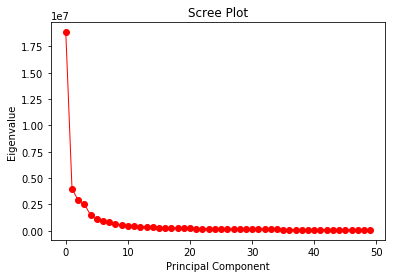

In [110]:
import matplotlib.pyplot as plt
plt.plot(w_sort_new[:50], 'ro-', linewidth=1)

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [111]:
type(w_sort_new)
w_arg_sort_new = np.flip(np.argsort(w_new))
top_new = w_arg_sort_new[:20]
print(top_new)

[399 398 397 396 395 394 393 392 391 390 389 388 387 386 385 384 383 382
 381 380]


In [112]:
topvec_new = v[:,top_new].T

In [113]:
proj_new = cen_new.dot(topvec_new.T)
print(proj_new.shape)

(400, 20)


In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler_new = MinMaxScaler()
scaled_proj_new = scaler.fit_transform(proj_new)

print(type(scaled_proj_new))
scaled_proj_new = np.insert(scaled_proj_new, 0, 1.0, axis=1)
print(scaled_proj_new)
print(scaled_proj_new.shape)

<class 'numpy.ndarray'>
[[1.         0.39305789 0.47462956 ... 0.45497717 0.33978685 0.80942291]
 [1.         0.36824757 0.21710922 ... 0.53381422 0.51330977 0.49452469]
 [1.         0.31249157 0.66341259 ... 0.45465126 0.44046459 0.69423036]
 ...
 [1.         0.36400511 0.48619595 ... 0.37262119 0.48083836 0.53198836]
 [1.         0.3718385  0.51173851 ... 0.47188923 0.42504615 0.42252177]
 [1.         0.34738859 0.52156685 ... 0.35153746 0.49042198 0.41351135]]
(400, 21)


In [115]:
alpha_new = 0.01
epoch_new = 20
teta_new = np.random.rand(21,1)
teta1_new =sgd(scaled_proj_new,trainy_new1,teta_new,alpha_new, epoch_new)  

In [116]:
te_new = test_new
#te = test.astype(np.float32)/255
print(te_new.shape)

cen_test_new = te_new - np.mean(te_new,axis=0).reshape(1,-1)
#print(cen_test)

f_new = cen_test_new.T
cov_test_new = f_new.dot(cen_test_new)
print(cov_test_new.shape)

cov_test_sc_new = cov_test_new/(cen_test_new.shape[0]-1)
print(cov_test_sc_new)

(100, 10000)
(10000, 10000)
[[6516.94333333 6407.75313131 6365.06494949 ... 1935.10363636
  1844.59121212 1775.6820202 ]
 [6407.75313131 6505.98222222 6544.73454545 ... 2109.53575758
  2022.93050505 1964.93010101]
 [6365.06494949 6544.73454545 6684.85767677 ... 2045.23858586
  1969.94555556 1925.38626263]
 ...
 [1935.10363636 2109.53575758 2045.23858586 ... 7032.57414141
  6694.83858586 6384.40080808]
 [1844.59121212 2022.93050505 1969.94555556 ... 6694.83858586
  6951.87181818 6647.89939394]
 [1775.6820202  1964.93010101 1925.38626263 ... 6384.40080808
  6647.89939394 6753.34707071]]


In [117]:
from numpy import linalg as LA
w_test_new,v_test_new = LA.eigh(cov_test_sc_new)

In [118]:
w_test_sort_new = -np.sort(-w_test_new)

w_test_arg_sort_new = np.flip(np.argsort(w_test_new))
top_test_new = w_test_arg_sort_new[:20]
#print(top_test)

topvec_test_new = v_test_new[:,top_test].T
print(topvec_test_new.shape)


(20, 10000)


In [119]:
w_test_sort_new = -np.sort(-w_test_new)

w_test_arg_sort_new = np.flip(np.argsort(w_test_new))
top_test_new = w_test_arg_sort_new[:20]
#print(top_test)

topvec_test_new = v_test_new[:,top_test_new].T
print(topvec_test_new.shape)


(20, 10000)


In [120]:
proj_test_new = cen_test_new.dot(topvec_test_new.T)
print(proj_test_new.shape)
print(proj_test_new)
from sklearn.preprocessing import MinMaxScaler
scaler_test_new = MinMaxScaler()
scaled_proj_test_new = scaler_test_new.fit_transform(proj_test_new)
scaled_proj_test_new

(100, 20)
[[-4.96716686e+03  1.04289115e+03 -1.61154942e+03 ...  2.56753506e+02
  -1.28447021e+02 -5.55469022e+00]
 [ 1.97319924e+03  1.11357733e+03 -1.73688465e+03 ...  2.70565235e+02
  -2.27029440e+02 -2.16384250e+02]
 [ 1.70124582e+03  1.66802570e+03  2.05778505e+03 ... -4.63027192e+02
  -3.86177473e+02 -6.16704691e+02]
 ...
 [-9.33279553e+03  7.57173496e+02  2.48288862e+02 ...  1.22434814e+01
  -2.00405864e+01 -3.84384263e+01]
 [-2.13630437e+03 -1.69468901e+03  1.65400643e+03 ...  2.83850296e+02
  -6.85565461e+02  1.27821660e+02]
 [-9.33279553e+03  7.57173496e+02  2.48288862e+02 ...  1.22434814e+01
  -2.00405864e+01 -3.84384263e+01]]


array([[0.20706246, 0.60874962, 0.27887893, ..., 0.41767096, 0.55119631,
        0.4268401 ],
       [0.53624514, 0.61622432, 0.26628034, ..., 0.42084084, 0.52143087,
        0.36525194],
       [0.52334634, 0.67485438, 0.64771714, ..., 0.25247657, 0.47337859,
        0.24830913],
       ...,
       [0.        , 0.57853645, 0.4658282 , ..., 0.3615543 , 0.58392796,
        0.41723401],
       [0.34133073, 0.31926462, 0.60712967, ..., 0.42388985, 0.38298302,
        0.4658024 ],
       [0.        , 0.57853645, 0.4658282 , ..., 0.3615543 , 0.58392796,
        0.41723401]])

In [121]:
scaled_proj_test_new = np.insert(scaled_proj_test_new, 0, 1.0, axis=1)
print(scaled_proj_test_new)
print(scaled_proj_test_new.shape)

[[1.         0.20706246 0.60874962 ... 0.41767096 0.55119631 0.4268401 ]
 [1.         0.53624514 0.61622432 ... 0.42084084 0.52143087 0.36525194]
 [1.         0.52334634 0.67485438 ... 0.25247657 0.47337859 0.24830913]
 ...
 [1.         0.         0.57853645 ... 0.3615543  0.58392796 0.41723401]
 [1.         0.34133073 0.31926462 ... 0.42388985 0.38298302 0.4658024 ]
 [1.         0.         0.57853645 ... 0.3615543  0.58392796 0.41723401]]
(100, 21)


In [122]:
y_pred_new = scaled_proj_test_new.dot(teta1_new)
print(y_pred_new)
testy_new.shape

[[39.02661681535516]
 [35.80869652666487]
 [33.614482787496506]
 [38.28341449576549]
 [34.59295003489313]
 [36.50102610321792]
 [38.07311986763671]
 [41.01086506243658]
 [36.45376293902435]
 [33.177064119442136]
 [33.25644986459009]
 [40.33847094663549]
 [35.58246660511206]
 [36.07229820762134]
 [41.69280253314099]
 [42.1794912489489]
 [31.078287385161403]
 [35.49175041569115]
 [39.45744287163252]
 [37.68237270103278]
 [37.156358708110325]
 [40.40315997481047]
 [35.586591254252546]
 [37.156358708110325]
 [37.753904531669754]
 [37.156358708110325]
 [37.156358708110325]
 [32.478850841102044]
 [34.841356210660756]
 [33.70570036578695]
 [41.867085894993664]
 [36.8575585165858]
 [40.380822379507954]
 [37.156358708110325]
 [43.373584948398175]
 [40.86481443263548]
 [43.25167313078451]
 [39.82966748399633]
 [40.76928278196409]
 [37.8755865828524]
 [38.24233401574009]
 [41.178134840456956]
 [37.967410228432534]
 [34.92354844332297]
 [32.404442512135454]
 [37.156358708110325]
 [37.3956899266546

(100,)

In [124]:
from sklearn.metrics import mean_squared_error
import math
MSE_new = mean_squared_error(testy_new,y_pred_new)
print("MSE_new is " , MSE_new)
#Calculating RMSE
RMSE_new = math.sqrt(MSE_new)
print("RMSE_new is ", RMSE_new )

MSE_new is  326.9323512503439
RMSE_new is  18.081270731072635


In [ ]:
#14.Instead of stochastic gradient descent, implement mini-batch gradient descent with batch size of your choice for the 
#tasks above. Please make a note on your batch size in the notebook.